Assignment -01             190539T-Sajeepan

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math
import random as rand


Q-1> Intensity transformation

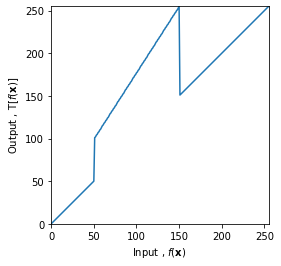

Text(0.5, 1.0, 'transformed image')

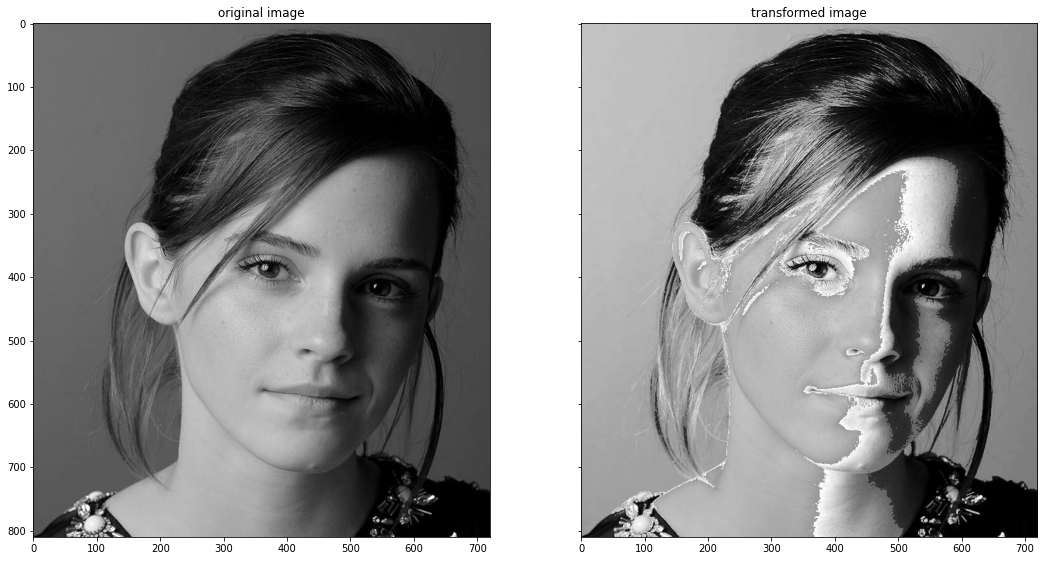

In [13]:
c=np.array([(50,50),(50,100),(150,150)])

t1=np.linspace(0,c[0,1],c[0,0]+1).astype('uint8')
t2=np.linspace(c[1,1]+1,255,c[2,0]-c[1,0]).astype('uint8')
t3=np.linspace(c[2,1]+1,255,255-c[2,0]).astype('uint8')

transform= np.concatenate((t1,t2),axis=0).astype('uint8')
transform= np.concatenate((transform,t3),axis=0).astype('uint8')

fig,ax=plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input , $f ( \mathbf { x } ) $ ')
ax.set_ylabel('Output , $\mathrm{T } [ f ( \mathbf { x } ) ] $')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

img_org =cv.imread('emma_gray.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_org, transform)

fig, ax =plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
ax[0].imshow(img_org,cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(image_transformed,cmap='gray')
ax[1].set_title('transformed image')


Q2> A brain proton density slice.

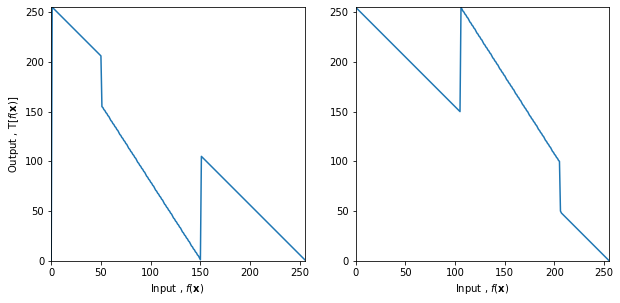

Text(0.5, 1.0, 'Transformed image gray matter')

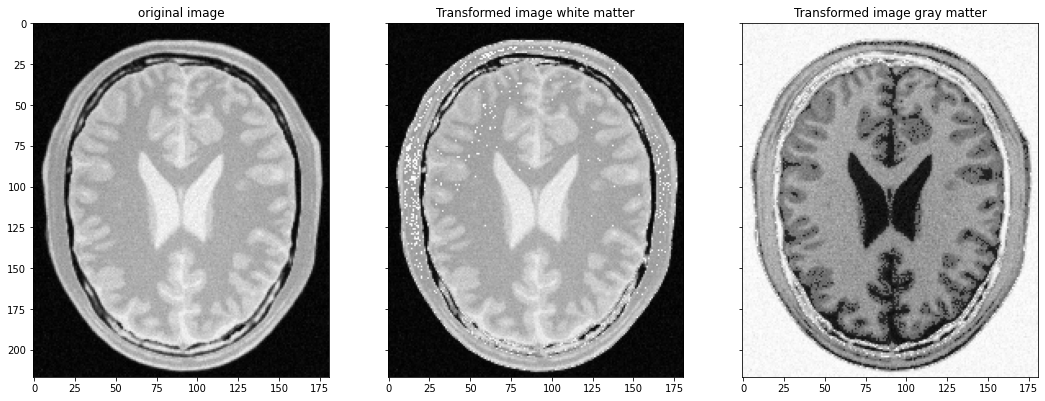

In [1]:
c=np.array([(50,50),(50,100),(150,150)])

t1=np.linspace(0,c[0,1],c[0,0]+1).astype('uint8')
t2=np.linspace(c[1,1]+1,255,c[2,0]-c[1,0]).astype('uint8')
t3=np.linspace(c[2,1]+1,255,255-c[2,0]).astype('uint8')

transform= np.concatenate((t1,t2),axis=0).astype('uint8')
transform= np.concatenate((transform,t3),axis=0).astype('uint8')

c=np.array([(105,150),(205,100),(205,50)])

t_1=np.linspace(255,c[0,1],c[0,0]+1).astype('uint8')
t_2=np.linspace(255,c[1,1],c[1,0]-c[0,0]).astype('uint8')
t_3=np.linspace(c[2,1],0,c[1,1]-c[2,1]).astype('uint8')


t_w= np.concatenate((t_1,t_2),axis=0).astype('uint8')
t_w= np.concatenate((t_w,t_3),axis=0).astype('uint8')

fig,ax=plt.subplots(1,2,figsize=(10,10))
ax[0].plot(-transform)
ax[0].set_xlabel(r'Input , $f ( \mathbf { x } ) $ ')
ax[0].set_ylabel('Output , $\mathrm{T } [ f ( \mathbf { x } ) ] $')
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)
ax[0].set_aspect('equal')
ax[1].plot(t_w)
ax[1].set_xlabel(r'Input , $f ( \mathbf { x } ) $ ')
ax[1].set_xlim(0,255)
ax[1].set_ylim(0,255)
ax[1].set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_org =cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
image_trans_white = cv.LUT(img_org, transform)
image_trans_gray = cv.LUT(img_org, t_w)

7
fig, ax  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,18))
ax[0].imshow(img_org,cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(image_trans_white,cmap='gray')
ax[1].set_title('Transformed image white matter')
ax[2].imshow(image_trans_gray,cmap='gray')
ax[2].set_title('Transformed image gray matter')


Q3> gamma correction & histograms

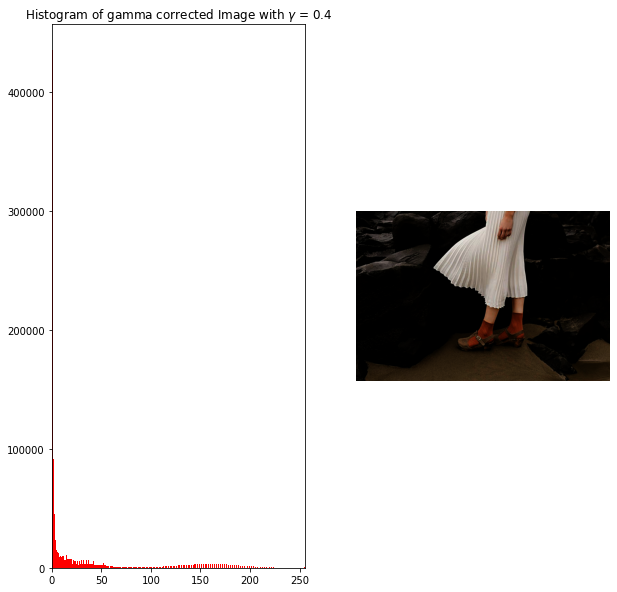

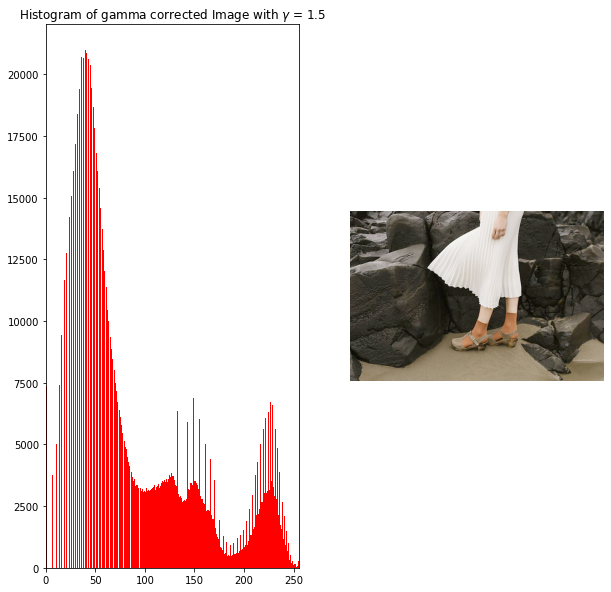

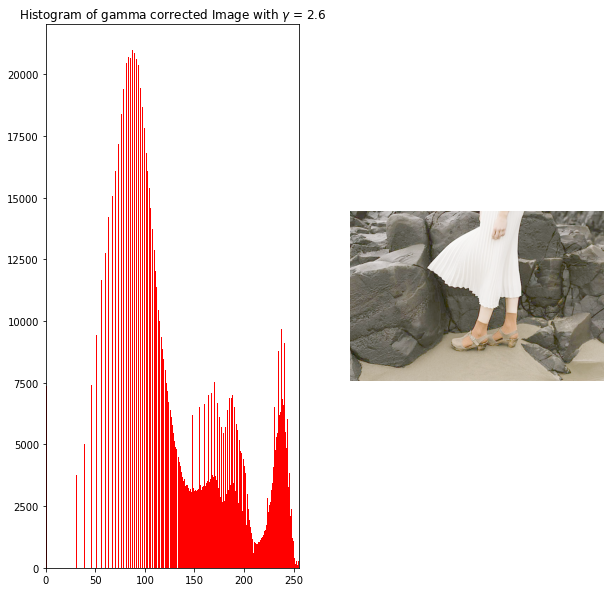

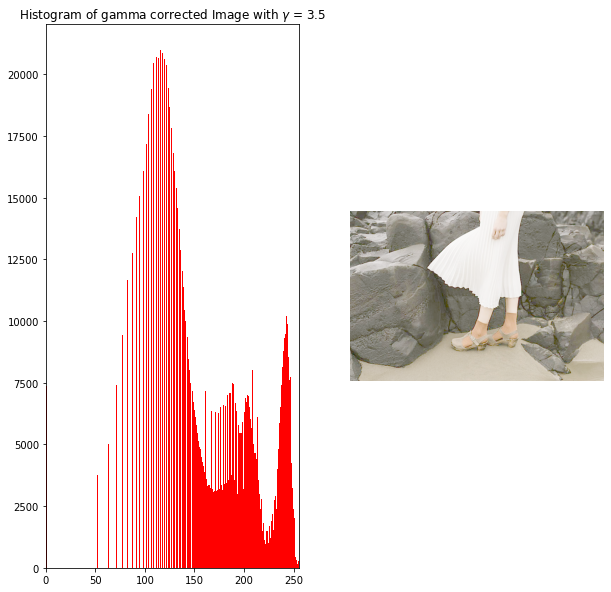

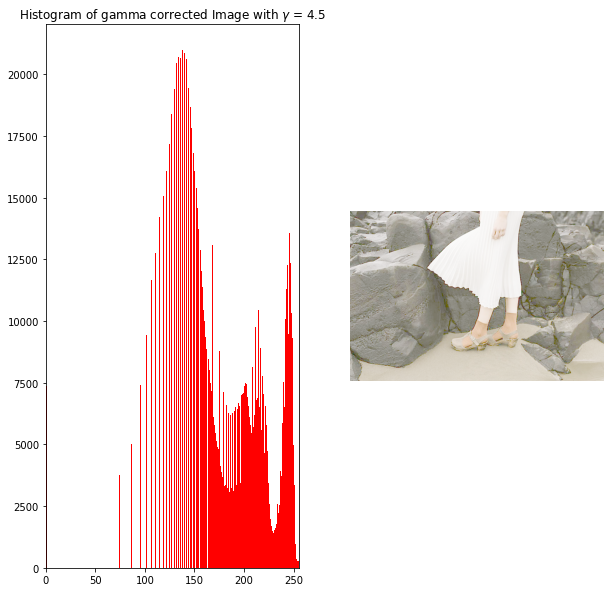

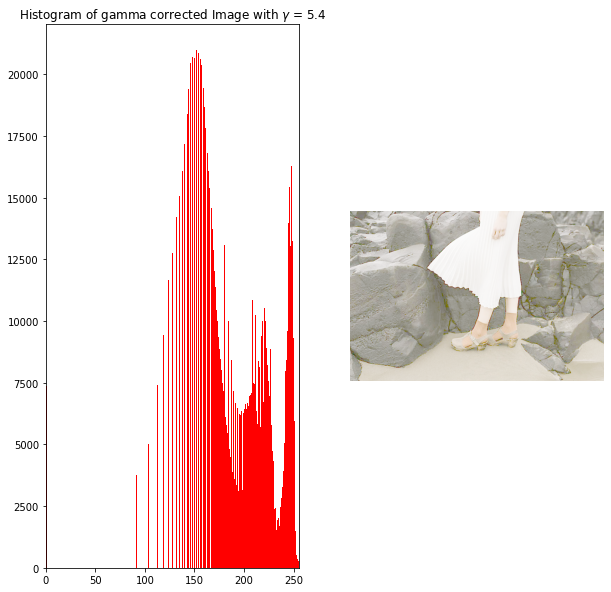

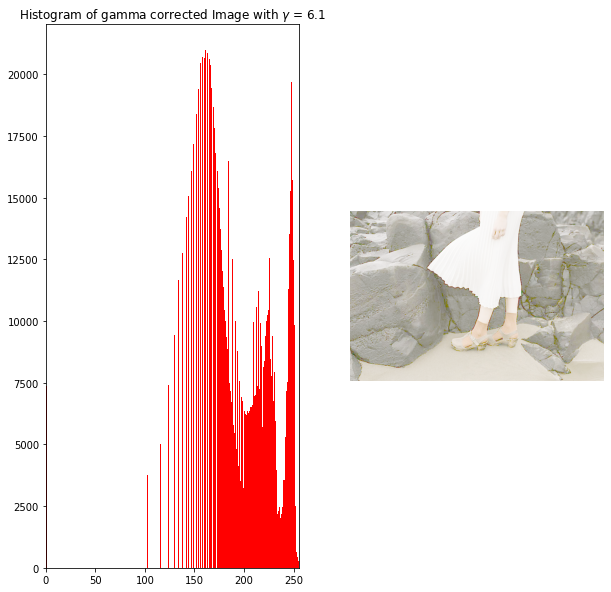

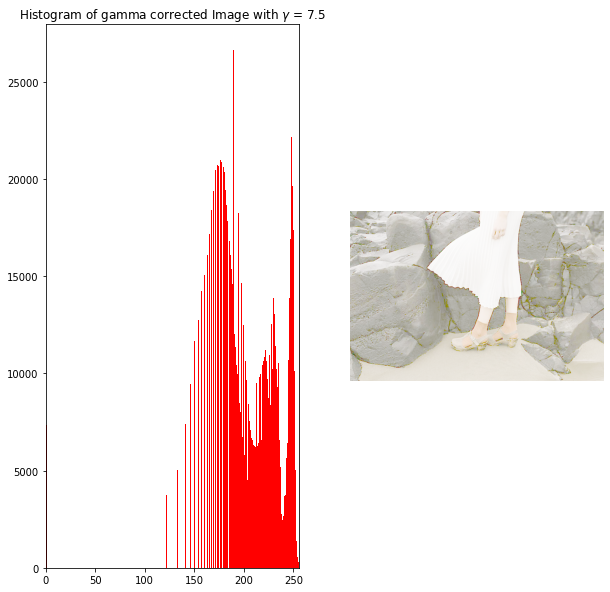

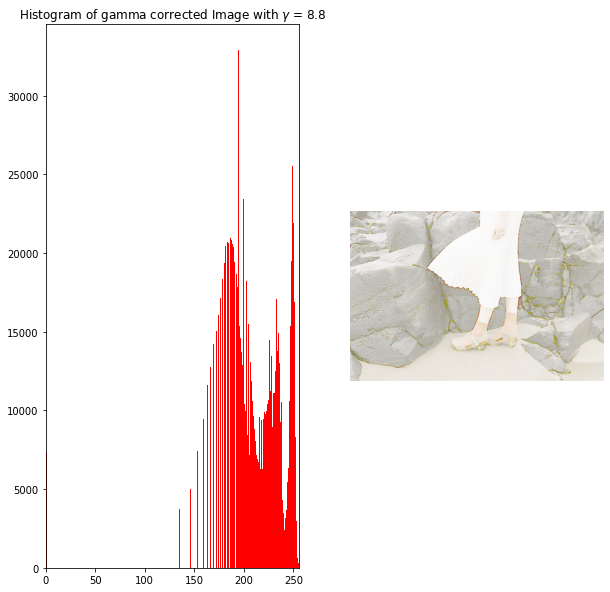

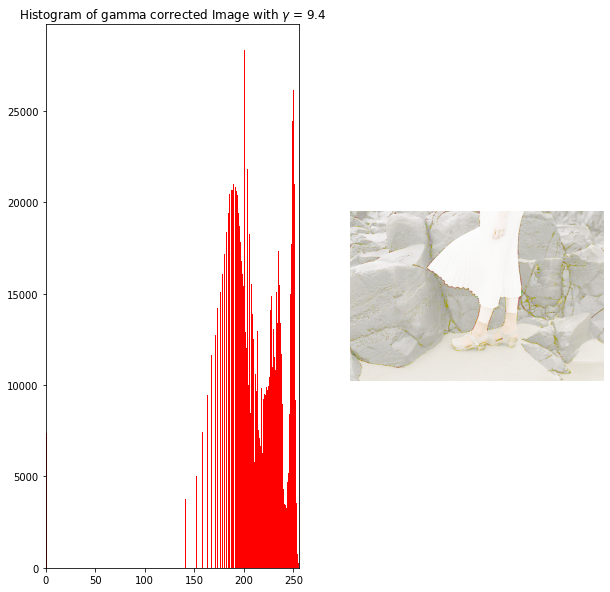

In [15]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma
 
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
 
    return cv.LUT(src, table)


img = cv.imread('highlights_and_shadows.jpg')

for i in range(10):
    gamma = i+rand.randint(0,9)*0.1
    gammaImg = gammaCorrection(img,gamma)
    fig,ax=plt.subplots(1,2,figsize=(10,10))
    ax[0].hist(gammaImg.flatten(),256,[0,256],color = 'r')
    ax[0].set_xlim([0,256])
    ax[0].set_title('Histogram of gamma corrected Image with $\gamma$ = {0}'.format(gamma))
    ax[1].imshow(cv.cvtColor(gammaImg,cv.COLOR_BGR2RGB))
    ax[1].axis('off')
    plt.show()
 
fig, ax =plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
cv.imshow('Original image', img)
cv.imshow('Gamma corrected image', gammaImg)
cv.waitKey(0)
cv.destroyAllWindows()

Q4> histogram equalization

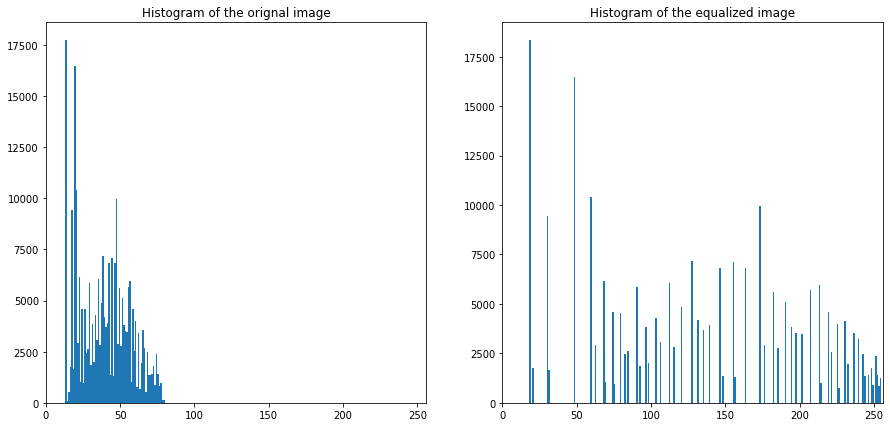

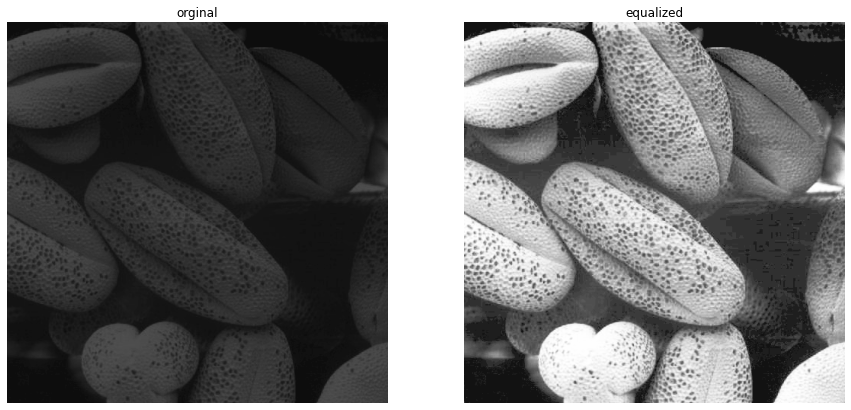

In [2]:
def histogramEqualization(image):
    hist ,bins = np.histogram(image.ravel(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf*(len(hist)-1)/cdf.max()
    transformation = cdf_normalized.astype(int)
    equalized = cv.LUT(image, transformation)
    return equalized
    
shells = cv.imread(r'shells.png', cv.IMREAD_GRAYSCALE)
equalized = histogramEqualization(shells)

fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_xlim([0, 256])
ax[0].title.set_text('Histogram of the orignal image')
ax[0].hist(shells.flatten(), 256, [0, 256]);
ax[1].set_xlim([0, 256])
ax[1].title.set_text('Histogram of the equalized image')
ax[1].hist(equalized.flatten(), 256, [0, 256]);

fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].axis('off')
ax[0].title.set_text('orginal Image')
ax[0].imshow(shells, cmap = 'gray', vmin =0, vmax=255)
ax[1].axis('off')
ax[1].title.set_text('equalized Image')
ax[1].imshow(equalized, cmap = 'gray', vmin =0, vmax=255)



Q5>  image zooming

In [ ]:
def zoom_nearest_neighbour(image, scale):
    rows = int(image.shape[0]*scale)
    cols = int(image.shape[1]*scale)
    zoomed = np.zeros((rows, cols, 3), dtype=image.dtype)
    for r in range(rows):
        for c in range(cols):           
            if round(r/scale) == image.shape[0]:
                r = round(r - scale)
            if round(c/scale) == image.shape[1]:
                c = round(c - scale)
            zoomed[r,c] = image[round(r/scale), round(c/scale)]

    return zoomed.astype(np.uint8)

def zoom_bilinear_interpolation(image, scale):
    rows = int(image.shape[0]*scale)
    cols = int(image.shape[1]*scale)
    zoomed = np.zeros((rows, cols, 3), dtype='float')
    for r in range(rows):
        for c in range(cols): 
            if math.ceil(r/scale) == image.shape[0]:
                r = round(r - scale)
            if math.ceil(c/scale) == image.shape[1]:
                c = round(c - scale)

            r_im, c_im = r/scale, c/scale
            row_floor_weight = math.ceil(r_im) - r_im
            row_ceil_weight = 1 - row_floor_weight
            col_floor_weight = math.ceil(c_im) - c_im
            col_ceil_weight = 1 - col_floor_weight
            l_pixel = image[math.floor(r_im), math.floor(c_im)]*row_floor_weight + image[math.ceil(r_im), math.floor(c_im)]*row_ceil_weight
            r_pixel = image[math.floor(r_im), math.ceil(c_im)]*row_floor_weight + image[math.ceil(r_im), math.ceil(c_im)]*row_ceil_weight
            zoomed[r,c,0] = l_pixel[0]*col_floor_weight + r_pixel[0]*col_ceil_weight
            zoomed[r,c,1] = l_pixel[1]*col_floor_weight + r_pixel[1]*col_ceil_weight
            zoomed[r,c,2] = l_pixel[2]*col_floor_weight + r_pixel[2]*col_ceil_weight

    return zoomed.astype(np.uint8)
 
#imamge set 1
im01 = cv.imread(r'im01.png', cv.IMREAD_COLOR)
im01 = cv.cvtColor(im01, cv.COLOR_BGR2RGB)
im01small = cv.imread(r'im01small.png', cv.IMREAD_COLOR)
im01small = cv.cvtColor(im01small, cv.COLOR_BGR2RGB)

s = 2.5
zoomed_NN = zoom_nearest_neighbour(im01small, s)
zoomed_BI = zoom_bilinear_interpolation(im01small, s)

cv.imshow('original image', cv.cvtColor(im01small, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()
cv.imshow('nearest neighbour: scale = '+ str(s), cv.cvtColor(zoomed_NN, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()
cv.imshow('bilinear interpolation: scale = '+ str(s), cv.cvtColor(zoomed_BI, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

#compare images
errorL2 = cv.norm(im01, zoom_bilinear_interpolation(im01small, 4), cv.NORM_L2)
similarity = 1 - errorL2/(im01.shape[0]*im01.shape[0])
print('Similarity for image 1 = ',similarity)


#image set 2
im02 = cv.imread(r'im02.png', cv.IMREAD_COLOR)
im02 = cv.cvtColor(im02, cv.COLOR_BGR2RGB)
im02small = cv.imread(r'im02small.png', cv.IMREAD_COLOR)
im02small = cv.cvtColor(im02small, cv.COLOR_BGR2RGB)

s = 1.5
zoomed_NN = zoom_nearest_neighbour(im02small, s)
zoomed_BI = zoom_bilinear_interpolation(im02small, s)

cv.imshow('original image', cv.cvtColor(im02small, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()
cv.imshow('nearest neighbour: scale = '+ str(s), cv.cvtColor(zoomed_NN, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()
cv.imshow('bilinear interpolation: scale = '+ str(s), cv.cvtColor(zoomed_BI, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

#compare images
errorL2 = cv.norm(im02, zoom_bilinear_interpolation(im02small, 4), cv.NORM_L2)
similarity = 1 - errorL2/(im02.shape[0]*im02.shape[0])
print('Similarity for image 2 = ',similarity)


# image set 3
im03 = cv.imread(r'im03.png', cv.IMREAD_COLOR)
im03 = cv.cvtColor(im03, cv.COLOR_BGR2RGB)
im03small = cv.imread(r'im03small.png', cv.IMREAD_COLOR)
im03small = cv.cvtColor(im03small, cv.COLOR_BGR2RGB)

s = 0.8
zoomed_NN = zoom_nearest_neighbour(im03small, s)
zoomed_BI = zoom_bilinear_interpolation(im03small, s)

cv.imshow('original image', cv.cvtColor(im03small, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()
cv.imshow('nearest neighbour: scale = '+ str(s), cv.cvtColor(zoomed_NN, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()
cv.imshow('bilinear interpolation: scale = '+ str(s), cv.cvtColor(zoomed_BI, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

#compare images
errorL2 = cv.norm(im02, zoom_bilinear_interpolation(im03small, 4), cv.NORM_L2)
similarity = 1 - errorL2/(im03.shape[0]*im02.shape[0])
print('Similarity for image 2 = ',similarity)

Q6> Filtering with the Sobel operator

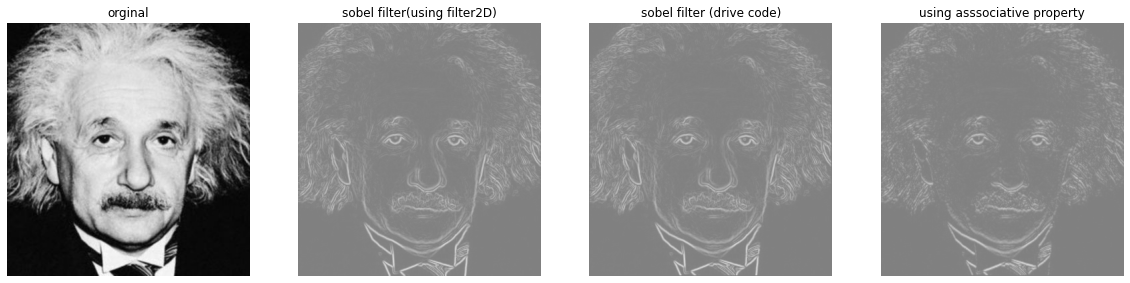

In [5]:
def filter(image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1] % 2 == 1
    kernel_h, kernel_w = math.floor(kernel.shape[0]/2), math.floor(kernel.shape[1]/2)
    image_h, image_w = image.shape
    image_float = image.astype('float')
    filtered = np.zeros(image.shape, 'float')

    for i in range(kernel_h, image_h - kernel_h):
        for j in range(kernel_w , image_w - kernel_w):
            filtered[i, j] = np.dot(image_float[i - kernel_h : i + kernel_h + 1 , j - kernel_w : j+ kernel_w + 1].flatten(), kernel.flatten())

    return filtered


einstein = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)

kernel_y = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype = np.float32)
kernel_x = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype = np.float32)
image_y = cv.filter2D(einstein, -1, kernel_y)
image_x = cv.filter2D(einstein, -1, kernel_x)
grad_mag = np.sqrt(image_y**2 + image_x**2)

image_y1 = filter(einstein, kernel_y)
image_x1 = filter(einstein, kernel_x)
grad_mag1 = np.sqrt(image_y1**2 + image_x1**2)

kernel_y1 = np.array([-1, 0, 1], dtype = np.float32)
kernel_y2 = np.array([[-1], [2], [1]], dtype = np.float32)
image_y2 = cv.filter2D(einstein, -1, kernel_y1)
image_y2 = cv.filter2D(image_y2, -1, kernel_y2)

kernel_x1 = np.array([-1, -2, -1], dtype = np.float32)
kernel_x2 = np.array([[1], [0], [-1]], dtype = np.float32)
image_x2 = cv.filter2D(einstein, -1, kernel_x1)
image_x2 = cv.filter2D(image_x2, -1, kernel_x2)

grad_mag2 = np.sqrt(image_y2**2 + image_x2**2)

fig, ax = plt.subplots(1,4, figsize=(20,20))
ax[0].axis('off')
ax[0].title.set_text('orginal')
ax[0].imshow(einstein, cmap = 'gray', vmin =0, vmax=255)

ax[1].axis('off')
ax[1].title.set_text('sobel filter(using filter2D)')
ax[1].imshow(grad_mag, cmap = 'gray', vmin =-1020, vmax=1020)

ax[2].axis('off')
ax[2].title.set_text('sobel filter (drive code)')
ax[2].imshow(grad_mag1, cmap = 'gray', vmin =-1020, vmax=1020)

ax[3].axis('off')
ax[3].title.set_text('using asssociative property')
ax[3].imshow(grad_mag2, cmap = 'gray', vmin =-1020, vmax=1020)

Q7> foreground and background focus.

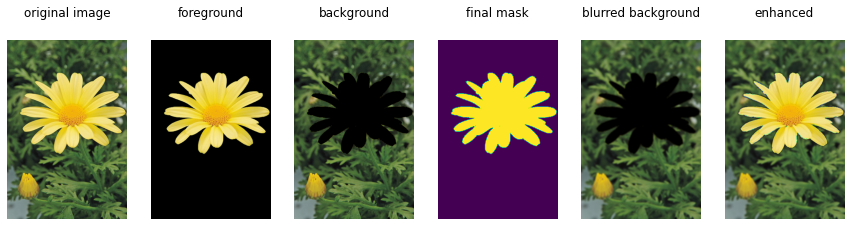

In [7]:
img = cv.imread(r'daisy.jpg', cv.IMREAD_COLOR)
assert img is not None
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#part A
mask = np.zeros(img_rgb.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (30,70,650,550)

cv.grabCut(img_rgb,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
fore = img_rgb*mask2[:,:,np.newaxis]
back = img_rgb - fore

#part B
blurred_bg = cv.GaussianBlur(back, (9,9), 4)
enhanced = fore + blurred_bg


fig1, ax = plt.subplots(1,6, figsize=(15,15))
ax[0].imshow(img_rgb)
ax[0].title.set_text('original image')
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(fore)
ax[1].title.set_text('foreground')
ax[1].axis('off')
ax[1].xaxis.tick_top()

ax[2].imshow(back)
ax[2].title.set_text('background')
ax[2].axis('off')
ax[2].xaxis.tick_top()

ax[3].imshow(mask2)
ax[3].title.set_text('final mask')
ax[3].axis('off')
ax[3].xaxis.tick_top()

ax[4].imshow(blurred_bg)
ax[4].title.set_text('blurred background')
ax[4].axis('off')
ax[4].xaxis.tick_top()

ax[5].imshow(enhanced)
ax[5].title.set_text('enhanced')
ax[5].axis('off')
ax[5].xaxis.tick_top()